In [1]:
# Importing Libraries
import time
start_time = time.time()
import pandas_datareader.data as web
from pandas_datareader import data
import datetime
from datetime import date
import pandas as pd
import numpy as np
import os
import fnmatch
from tabulate import tabulate
import requests
import csv
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

In [2]:
#Downloading Data For US Companies with Market Cap >= 10 Billion USD
headers = {
    "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0",
}

#Companies with Market cap>=10B USD requested from NASDAQ API
url = "https://api.nasdaq.com/api/screener/stocks?tableonly=true&limit=25&marketcap=large&download=true"
r = requests.get(url, headers=headers)
j = r.json()
print(r)

table = j['data']
table_headers = table['headers']

#Storing the File as 'Stocks.csv'
with open('Stocks.csv', 'w', newline='') as f_output:
    csv_output = csv.DictWriter(f_output, fieldnames=table_headers.values(), extrasaction='ignore')
    csv_output.writeheader()

    for table_row in table['rows']:
        csv_row = {table_headers.get(key, None) : value for key, value in table_row.items()}
        csv_output.writerow(csv_row)

<Response [200]>


In [3]:
### Reading the pulled filed out of NASDAQ API

## DATA for all companies present at the link ===> https://www.nasdaq.com/market-activity/stocks/screener
files = [f for f in os.listdir('.') if os.path.isfile(f)]
file_name = fnmatch.filter(files, '*.csv')
## Reading the excel file
df = pd.read_csv (file_name[0])

In [4]:
#Dates
today = date.today()
year = today.year
month = today.month
day = today.day

## Picking companies not less than 10 years of age 
# Extracting companies not older than 10 years
final_set = df[df["IPO Year"] >= (year-10)]

# retrieving ticker trading symbols
tickers = final_set.Symbol.values.tolist()
print("Shortlisted companies: " + str(len(tickers)))
print(tickers)
print("\n\n")

Shortlisted companies: 131
['ABEV', 'ABNB', 'ACI', 'AGR', 'ALC', 'ALLE', 'AMCR', 'AMH', 'ANET', 'AR', 'ARES', 'ARGX', 'ARMK', 'ASX', 'AVTR', 'BEKE', 'BGNE', 'BILL', 'BNTX', 'BSY', 'BURL', 'CARR', 'CDAY', 'CDW', 'CFG', 'CG', 'CHWY', 'CNHI', 'CPNG', 'CRBG', 'CRWD', 'CTVA', 'DASH', 'DD', 'DDOG', 'DELL', 'DOW', 'DT', 'EBR', 'ELP', 'ENPH', 'EPAM', 'EQH', 'ETSY', 'EVRG', 'FANG', 'FERG', 'FIVE', 'FNF', 'FTS', 'FTV', 'GDDY', 'GFL', 'GFS', 'GMAB', 'GSK', 'HLN', 'HLT', 'HPE', 'HUBB', 'HUBS', 'ICL', 'INVH', 'IQV', 'IR', 'J', 'JD', 'KEYS', 'LI', 'LIN', 'LW', 'MBLY', 'MDB', 'MPLX', 'MRNA', 'NET', 'NFE', 'NIO', 'NOW', 'NU', 'NWG', 'OKTA', 'OTIS', 'PAYC', 'PCTY', 'PDD', 'PINS', 'PLTR', 'QSR', 'RACE', 'RBLX', 'RELX', 'REXR', 'RIVN', 'RPRX', 'RTO', 'SE', 'SEDG', 'SHOP', 'SNAP', 'SNOW', 'SPLK', 'SPOT', 'SQ', 'STLA', 'SUZ', 'SYF', 'TAK', 'TEAM', 'TME', 'TRU', 'TTD', 'TW', 'U', 'UBER', 'UBS', 'VEEV', 'VICI', 'VIV', 'WDS', 'WES', 'WMG', 'WSC', 'XP', 'YMM', 'YUMC', 'ZI', 'ZM', 'ZS', 'ZTO', 'ZTS']





In [5]:
### Making a new dataframe

## Assign data of lists.  
market_dict = {'Symbol': [], 'Company Name': [], 'IPO Year': [], 'Market Cap': [], 'Market': [], 'First IPO Price': [], 'Today\'s Price': []}

## identifying starts and ends
start = datetime.datetime(year-12, month,1)
end = datetime.datetime(year, month, day) 
####YFINANCE HERE
## Requesting through yahoo finance  API(historic and current prices)
shortlisted = {}
for i in range(len(tickers)):
    test = web.DataReader(tickers[i], "yahoo", start, end)
    first_price = test.iloc[0,3]
    todays_price = test.iloc[-1,3]
    print(final_set.iloc[i,1])
    if ( (todays_price < (first_price + (first_price*0.03) ) ) and (todays_price > (first_price - (first_price*0.03) ) ) ):

        print("IPO'ed at: $"+str(first_price))
        print("Today's Price: $"+str(todays_price))
        print("--------------------------------------------\n")           
        
        market_dict['Symbol'].append(tickers[i])
        market_dict['Company Name'].append(final_set.iloc[i,1])
        market_dict['IPO Year'].append(final_set.iloc[i,7])
        market_dict['Market Cap'].append(final_set.iloc[i,5])
        market_dict['Market'].append("US")
        market_dict['First IPO Price'].append("$"+str(first_price))
        market_dict['Today\'s Price'].append("$"+str(todays_price))
        

        plot_name = "Shortlisted_Graphs/"+str(final_set.iloc[i,1])+".png"
        plt.plot(test.index, test.iloc[:,3])

        plt.xlabel("Time-series")
        plt.ylabel("Closing Index")
        plt.xticks(rotation = 45)
        plt.title(final_set.iloc[i,1])

        plt.savefig(plot_name, dpi = 720)
        plt.close()
        #saving shortlisted company details for later graphs
        shortlisted[str(final_set.iloc[i,1])] = test
      
df = pd.DataFrame(market_dict)

Ambev S.A. American Depositary Shares (Each representing 1 Common Share)
Airbnb Inc. Class A Common Stock
Albertsons Companies Inc. Class A Common Stock
Avangrid Inc. Common Stock
Alcon Inc. Ordinary Shares
Allegion plc Ordinary Shares
Amcor plc Ordinary Shares
American Homes 4 Rent Common Shares of Beneficial Interest
Arista Networks Inc. Common Stock
Antero Resources Corporation Common Stock
Ares Management Corporation Class A Common Stock
argenx SE American Depositary Shares
Aramark Common Stock
ASE Technology Holding Co. Ltd. American Depositary Shares (each representing Two Common Shares) 
Avantor Inc. Common Stock
KE Holdings Inc American Depositary Shares (each representing three Class A Ordinary Shares)
BeiGene Ltd. American Depositary Shares
Bill.com Holdings Inc. Common Stock
BioNTech SE American Depositary Share
Bentley Systems Incorporated Class B Common Stock
Burlington Stores Inc. Common Stock
Carrier Global Corporation Common Stock 
Ceridian HCM Holding Inc. Common Stock

In [6]:
print("\n\nFINAL SHORT-LISTED COMPANIES WITH PLUS MINUS 3% VALUE CONDITION")
display(df)
names = list(shortlisted.keys())



FINAL SHORT-LISTED COMPANIES WITH PLUS MINUS 3% VALUE CONDITION


,Symbol,Company Name,IPO Year,Market Cap,Market,First IPO Price,Today's Price
0,HLN,Haleon plc American Depositary Shares (Each re...,2022.0,3.301360e+10,US,$7.300000190734863,$7.150000095367432
1,PINS,Pinterest Inc. Class A Common Stock,2019.0,1.686082e+10,US,$24.399999618530273,$24.860000610351562
2,RPRX,Royalty Pharma plc Class A Ordinary Shares,2020.0,1.934242e+10,US,$44.5,$43.849998474121094
3,WES,Western Midstream Partners LP Common Units Rep...,2012.0,1.092829e+10,US,$27.75,$28.3799991607666


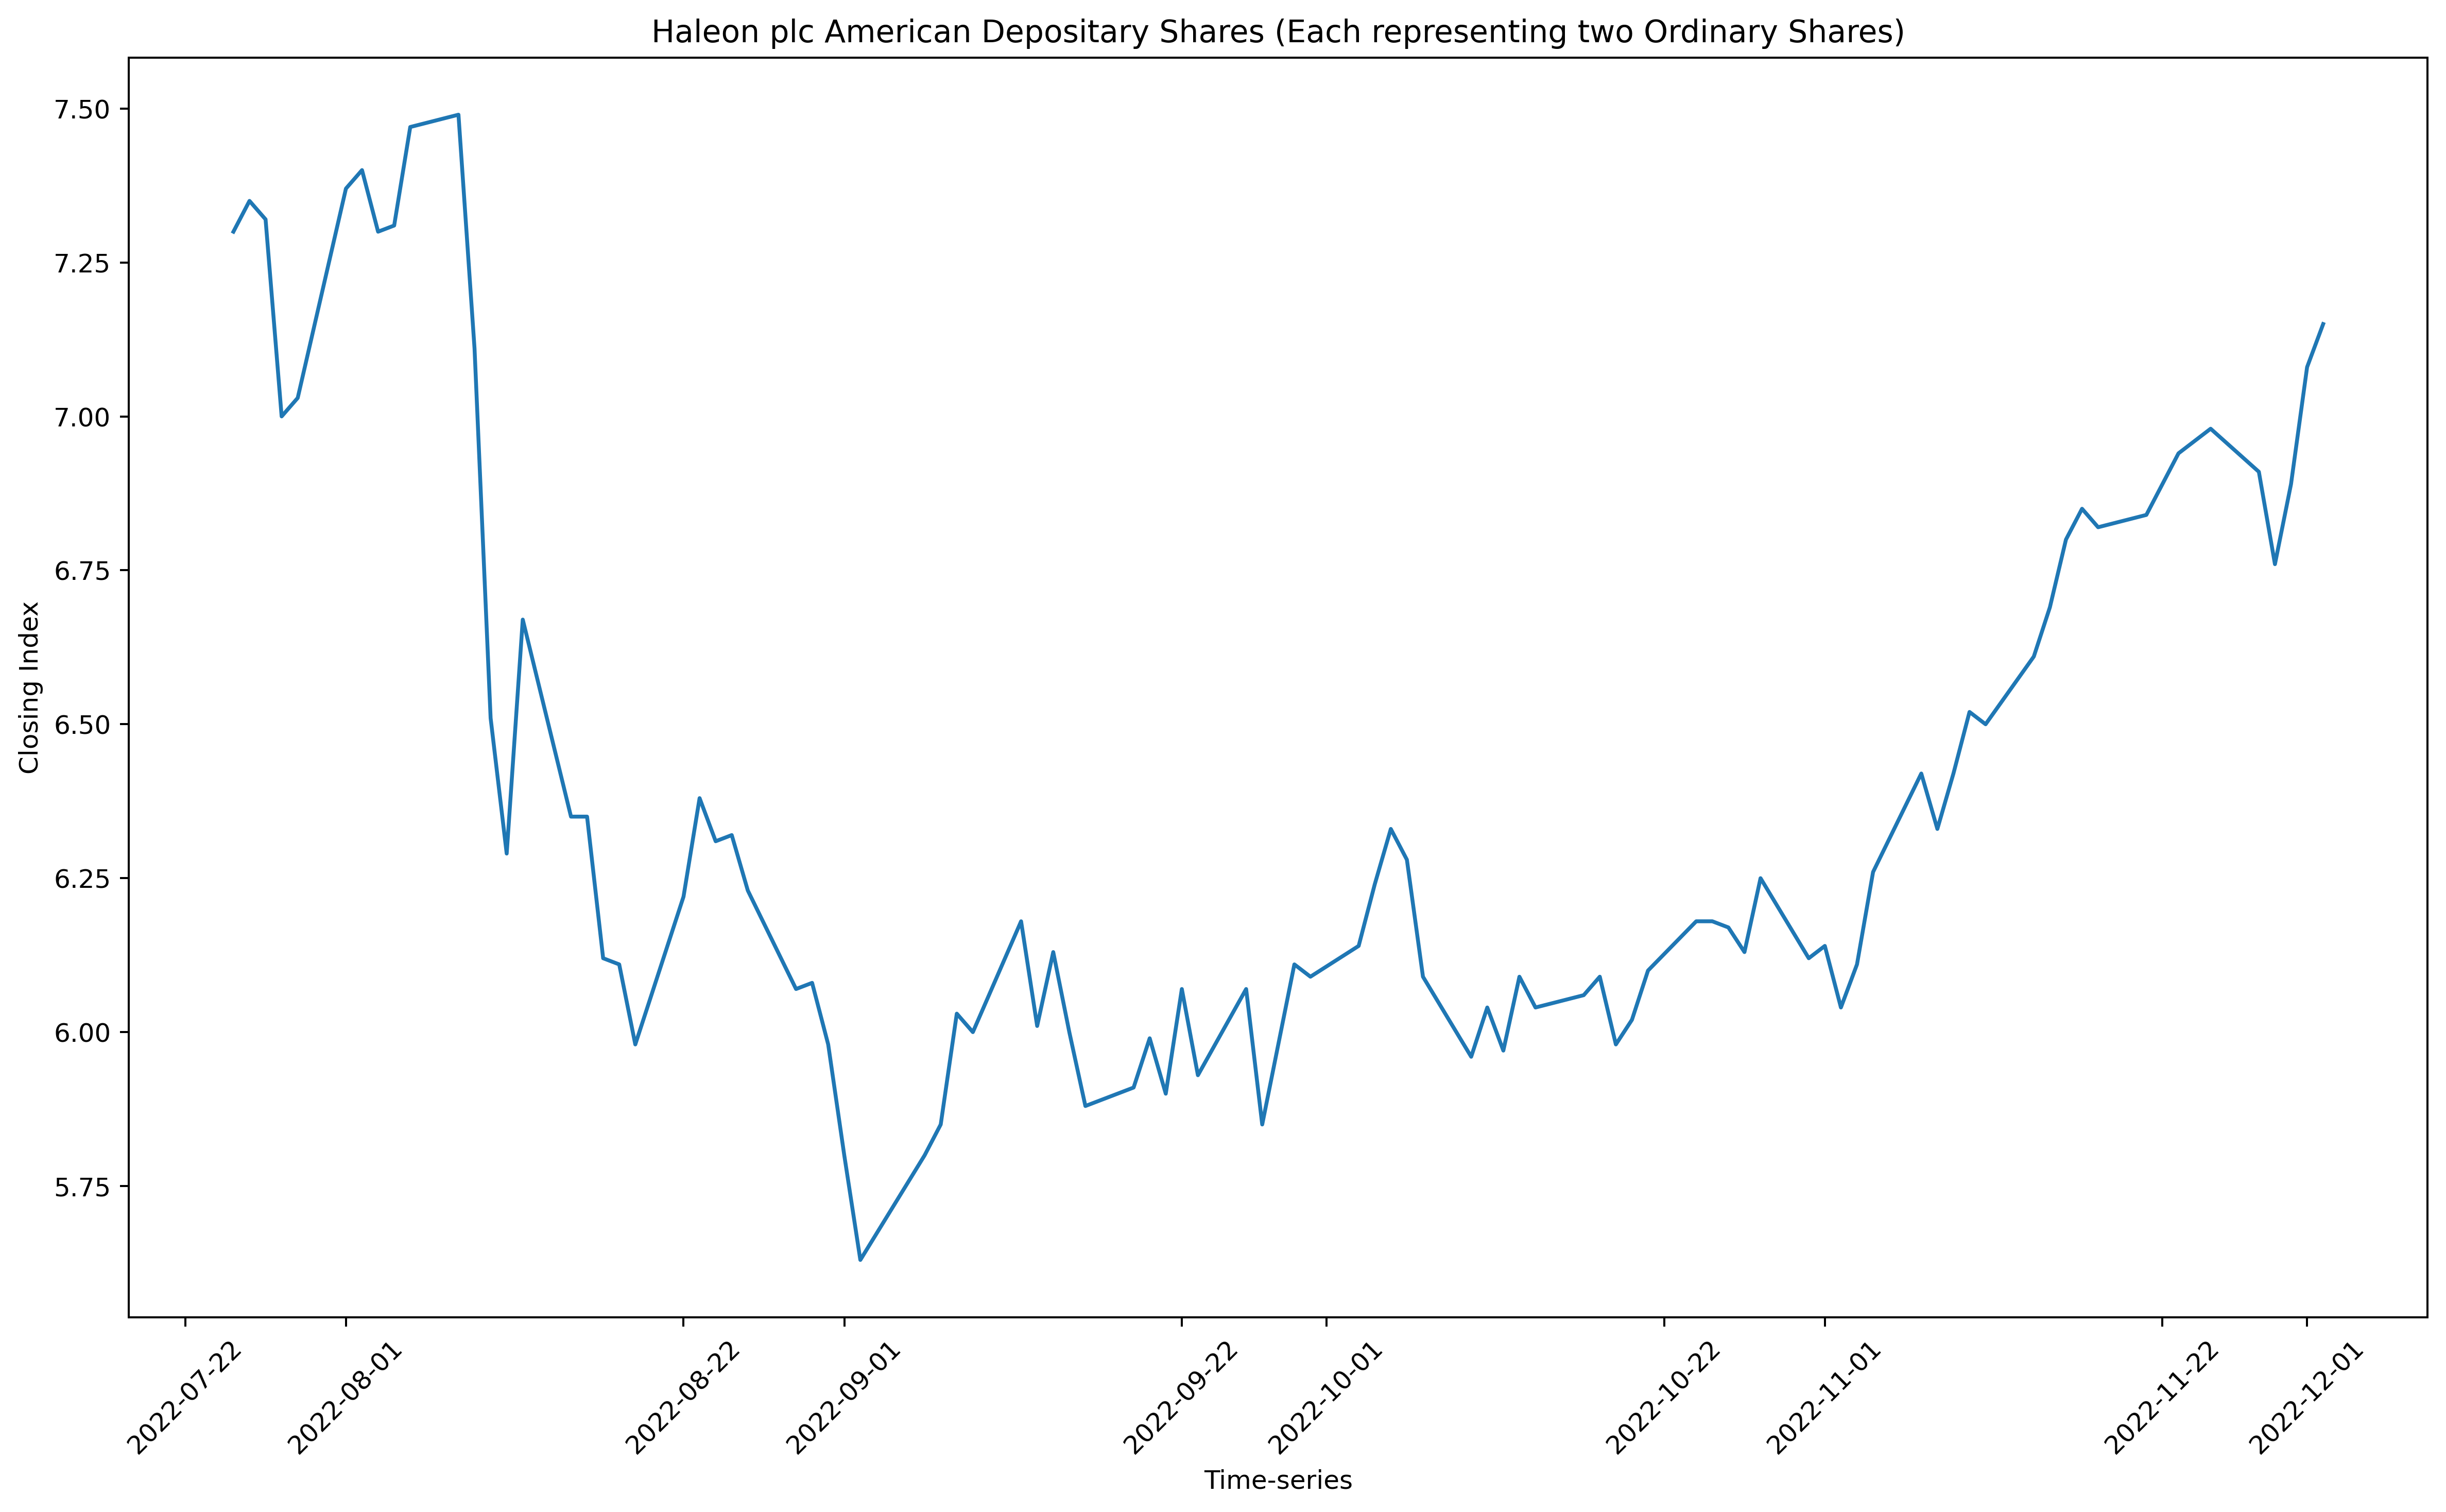

In [7]:
plt.figure(figsize=(16, 9), dpi=360)
plt.plot(shortlisted[names[0]].index, shortlisted[names[0]].iloc[:,3])

plt.xlabel("Time-series")
plt.ylabel("Closing Index")
plt.xticks(rotation = 45)
plt.title(names[0])

plt.savefig(plot_name, dpi = 720)
plt.show()




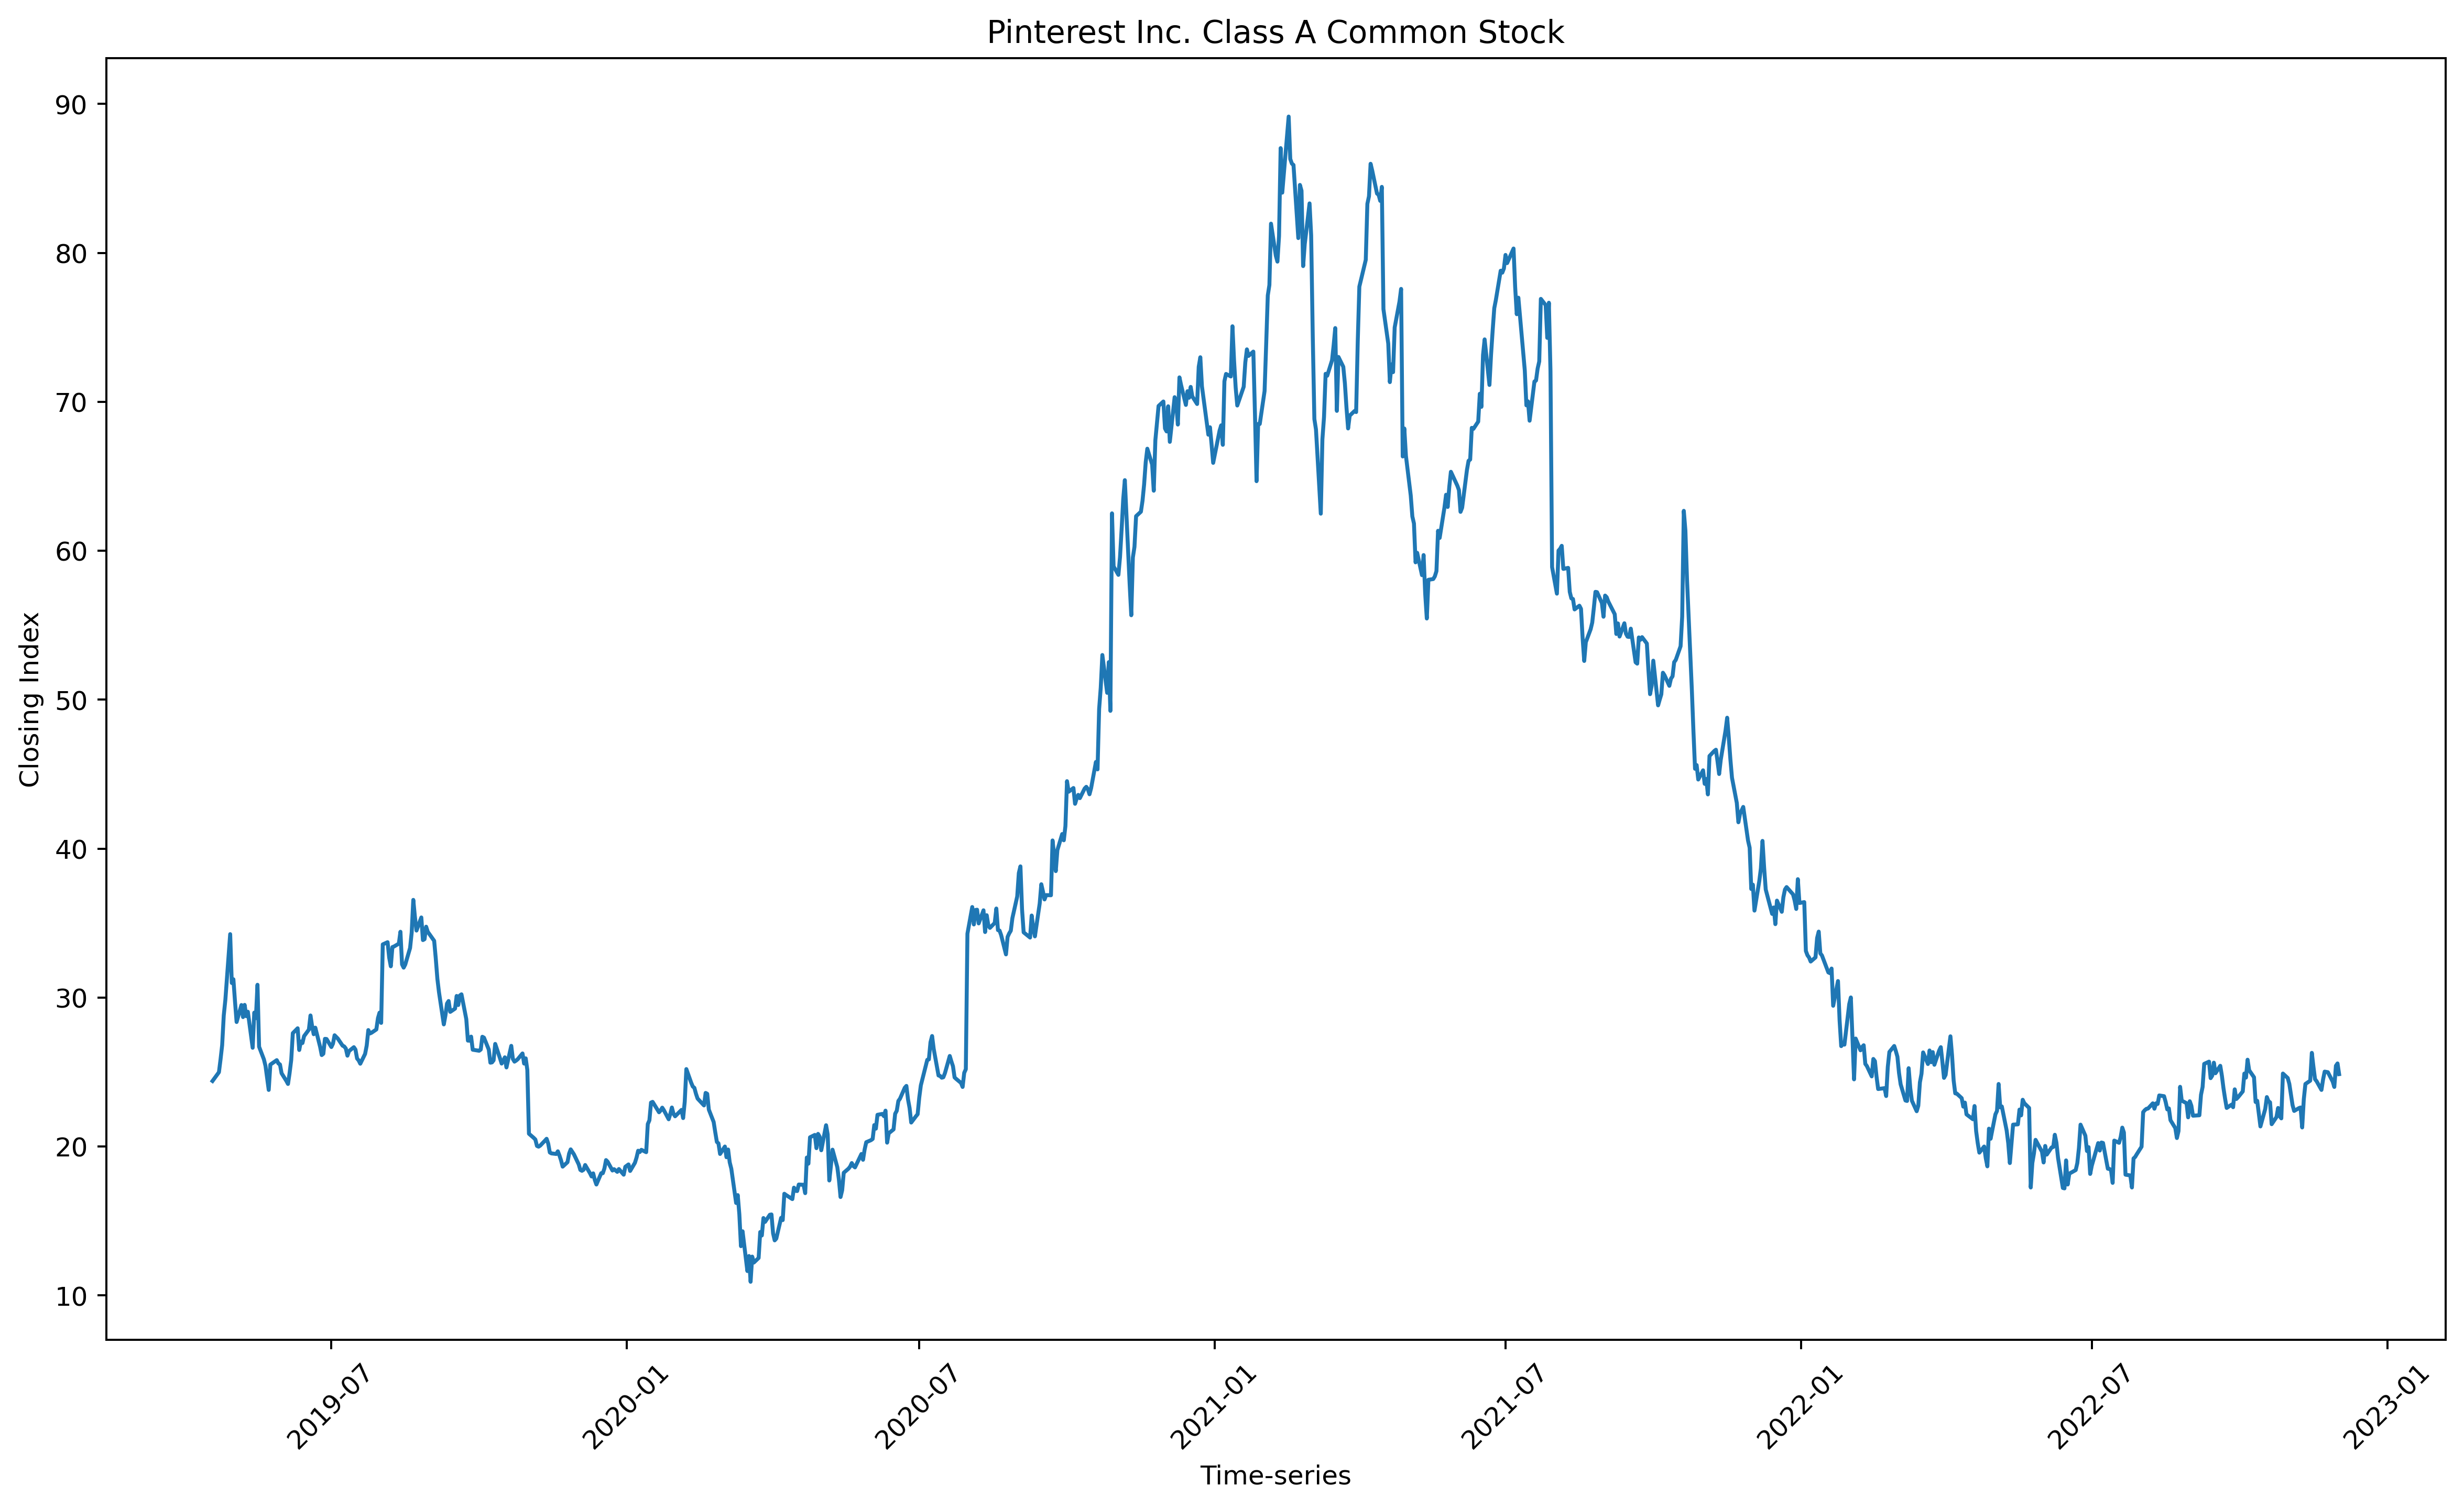

In [8]:
plt.figure(figsize=(16, 9), dpi=360)
plt.plot(shortlisted[names[1]].index, shortlisted[names[1]].iloc[:,3])

plt.xlabel("Time-series")
plt.ylabel("Closing Index")
plt.xticks(rotation = 45)
plt.title(names[1])

plt.savefig(plot_name, dpi = 720)
plt.show()

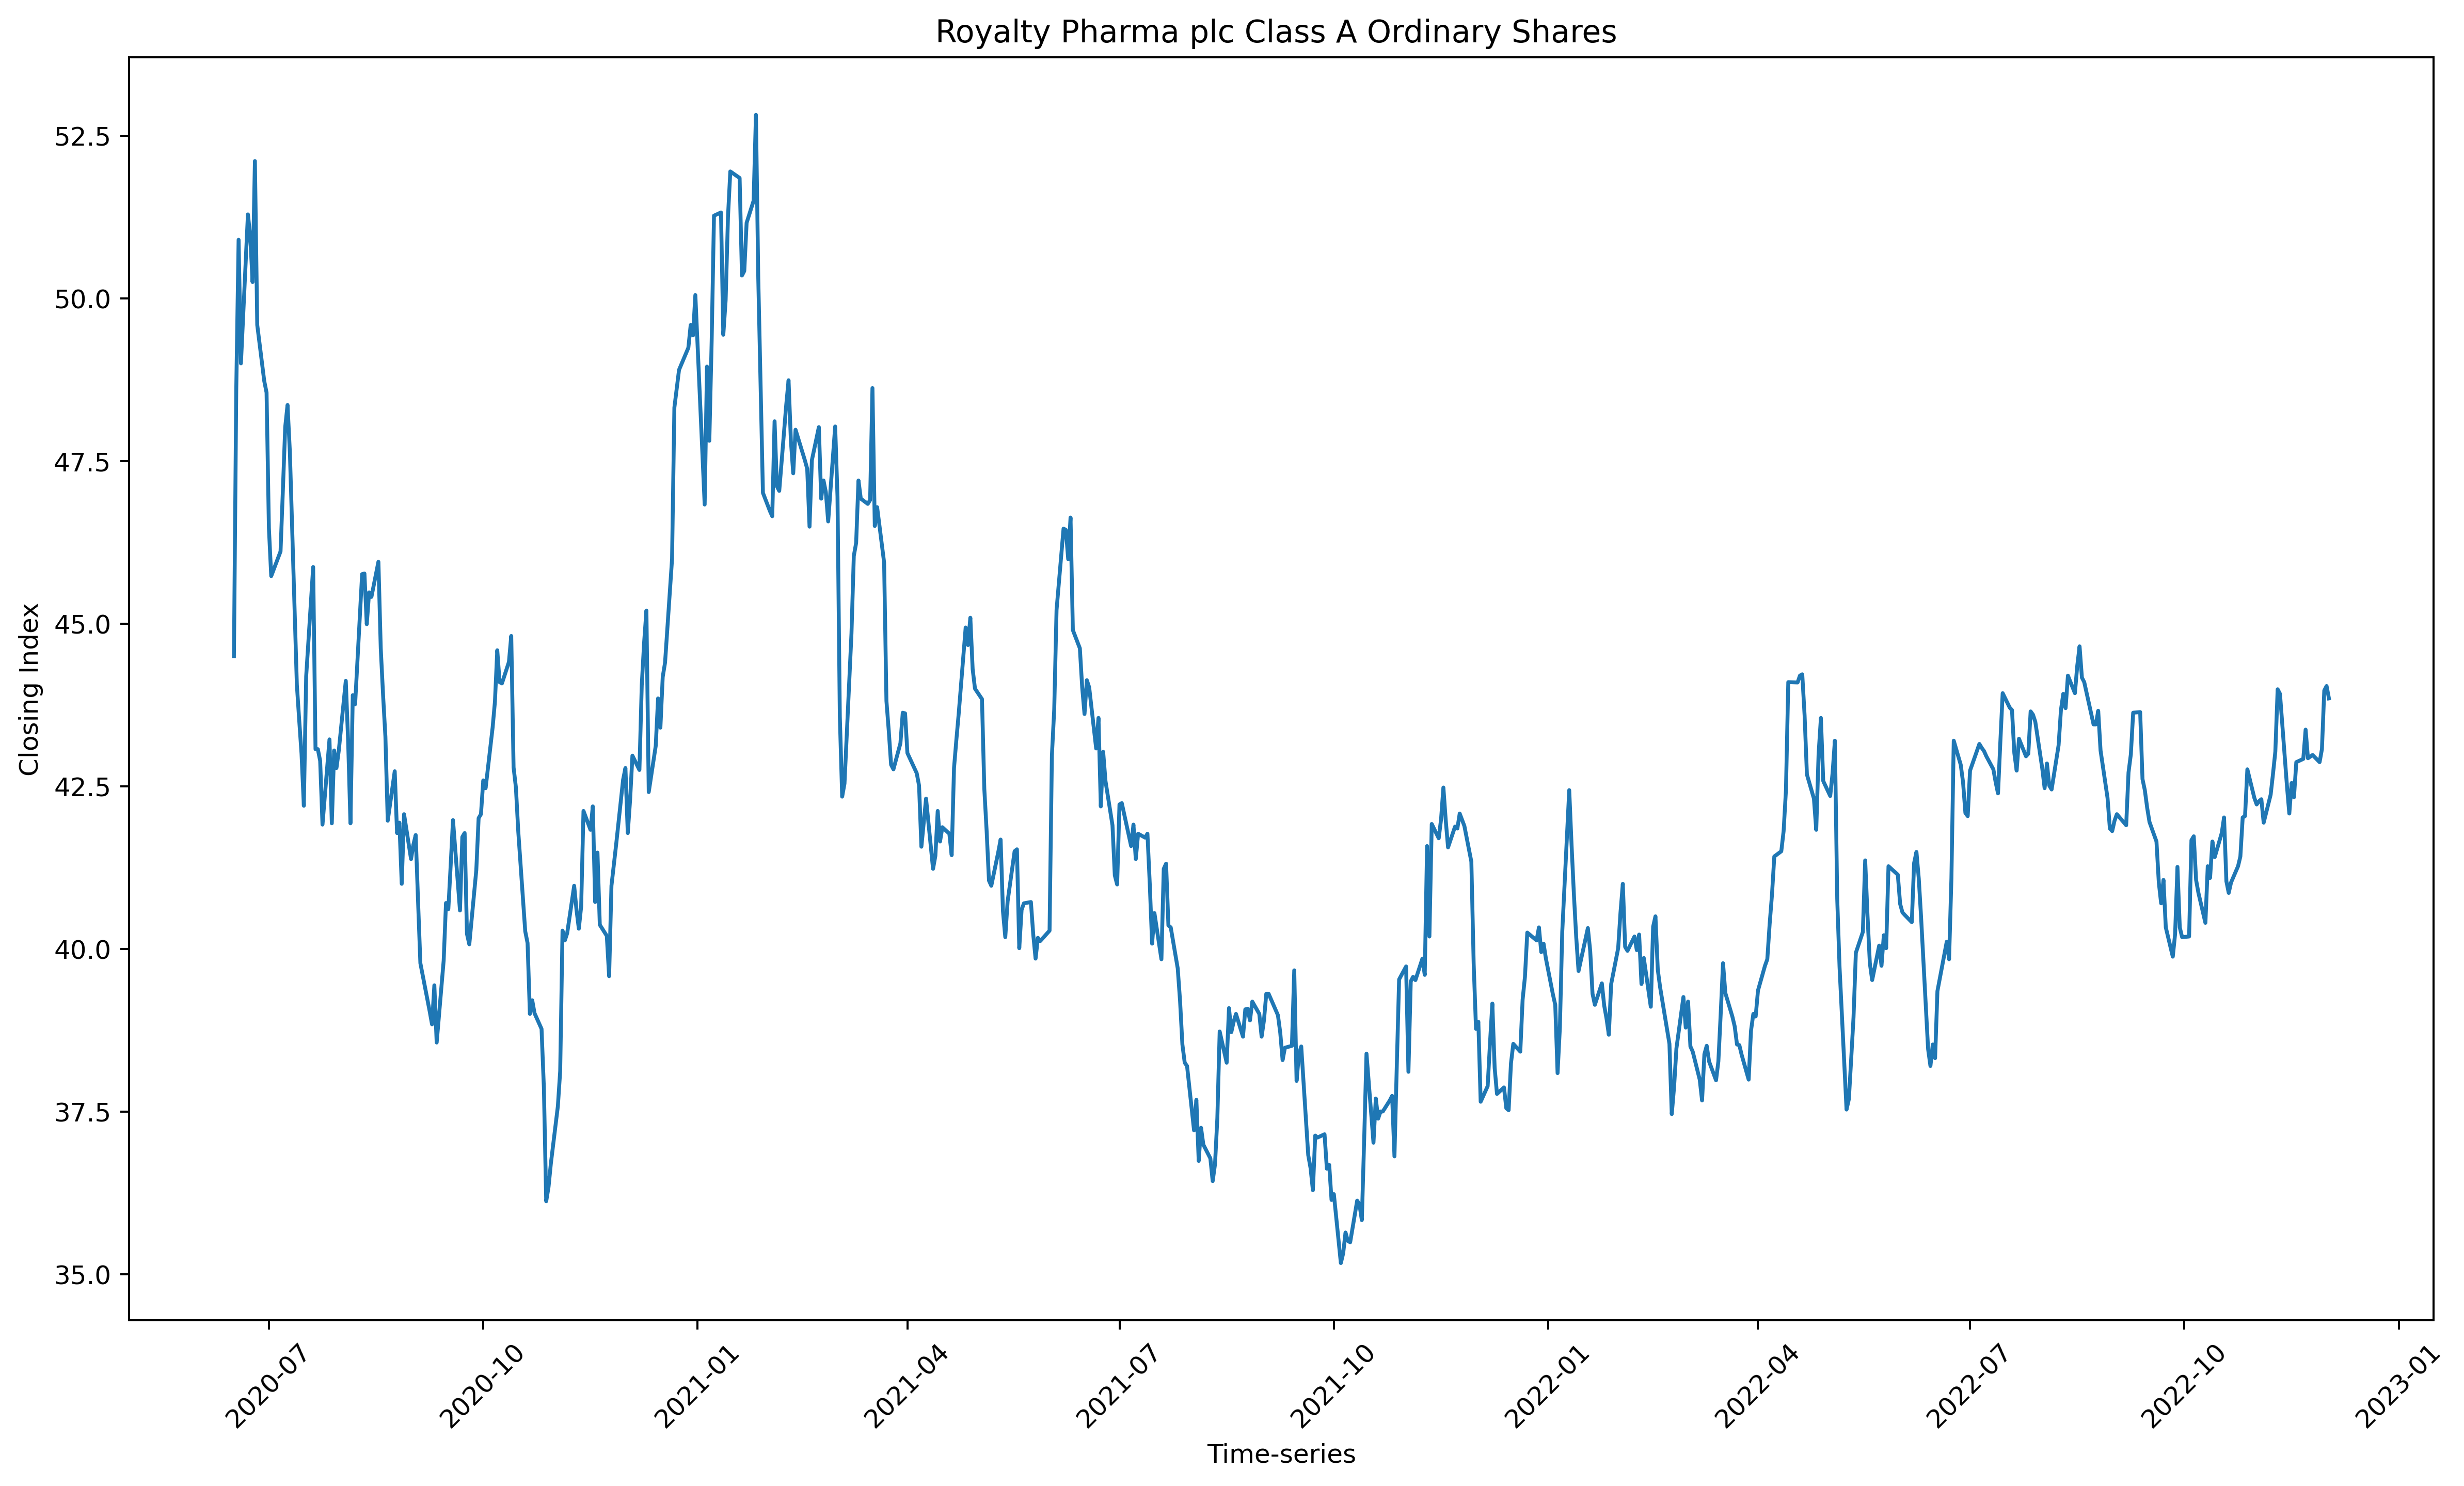

In [9]:
plt.figure(figsize=(16, 9), dpi=360)
plt.plot(shortlisted[names[2]].index, shortlisted[names[2]].iloc[:,3])

plt.xlabel("Time-series")
plt.ylabel("Closing Index")
plt.xticks(rotation = 45)
plt.title(names[2])

plt.show()

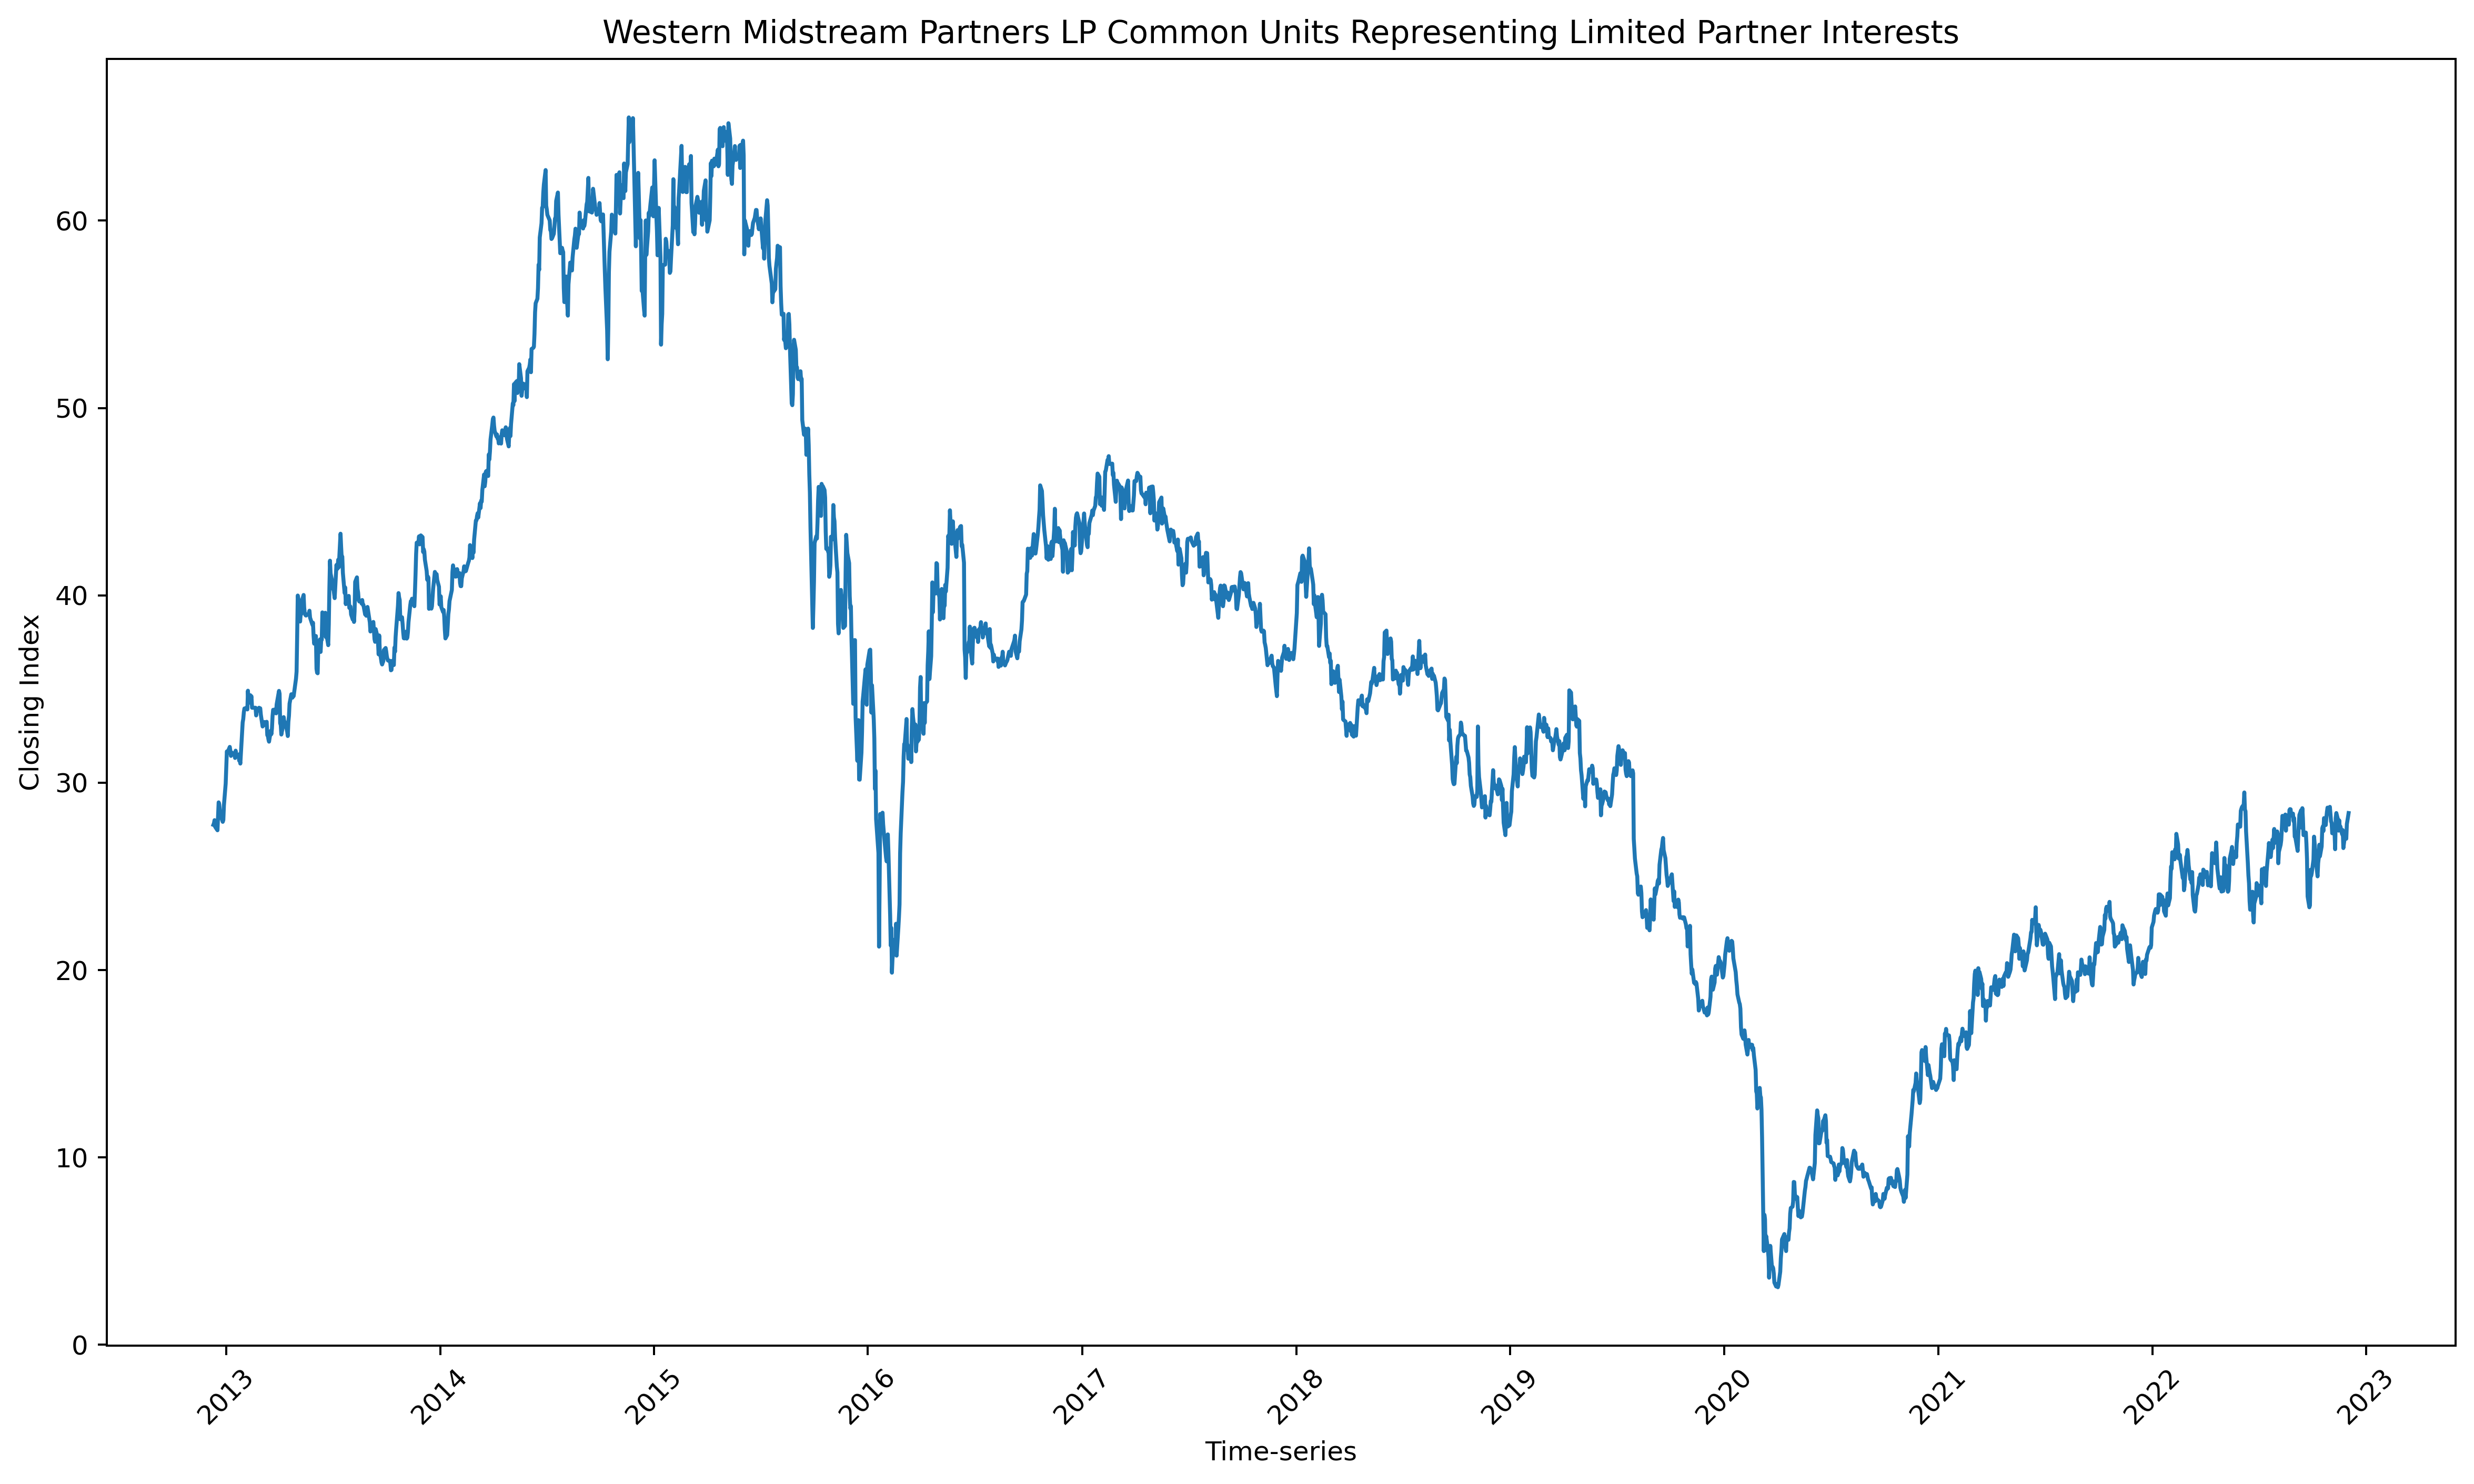

--- 175.61309456825256 seconds ---


In [10]:
plt.figure(figsize=(16, 9), dpi=360)
plt.plot(shortlisted[names[3]].index, shortlisted[names[3]].iloc[:,3])

plt.xlabel("Time-series")
plt.ylabel("Closing Index")
plt.xticks(rotation = 45)
plt.title(names[3])

plt.show()
print("--- %s seconds ---" % (time.time() - start_time)) 